<a href="https://colab.research.google.com/github/lezippo/PredictStudentsDropoutAndAcademicSuccess/blob/main/StudentsDropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Predict students' dropout and academic success
#Authors: Brigida Santarpia, Luca Barbato, Luigi Emanuele Zippo

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
import plotly.express as px
from matplotlib.figure import Figure
from sklearn.decomposition import PCA

#IMPORT DATASET

data = pd.read_csv('/content/data.csv',sep=';')

In [3]:
print("Dimensione del dataset: ", data.shape)

Dimensione del dataset:  (4424, 37)


In [4]:
print("\nConteggio valori NULL:\n")
data.info()

print("\n")
data.describe()


Conteggio valori NULL:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualifi

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
print("Numero feature duplicate:")
data.duplicated().sum()

Numero feature duplicate:


0

In [6]:
#PIE CHART BASED ON 'TARGET' FEATURE'S DISTRIBUTION

data['Target'].value_counts()

X = data['Target'].value_counts().index
y = data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': X,
    'Count_T' : y
})

fig = px.pie(df,

             names ='Target',
             values ='Count_T',
             title='Quanti dropouts, enrolled e graduates ci sono nella colonna Target')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0])


fig.show()

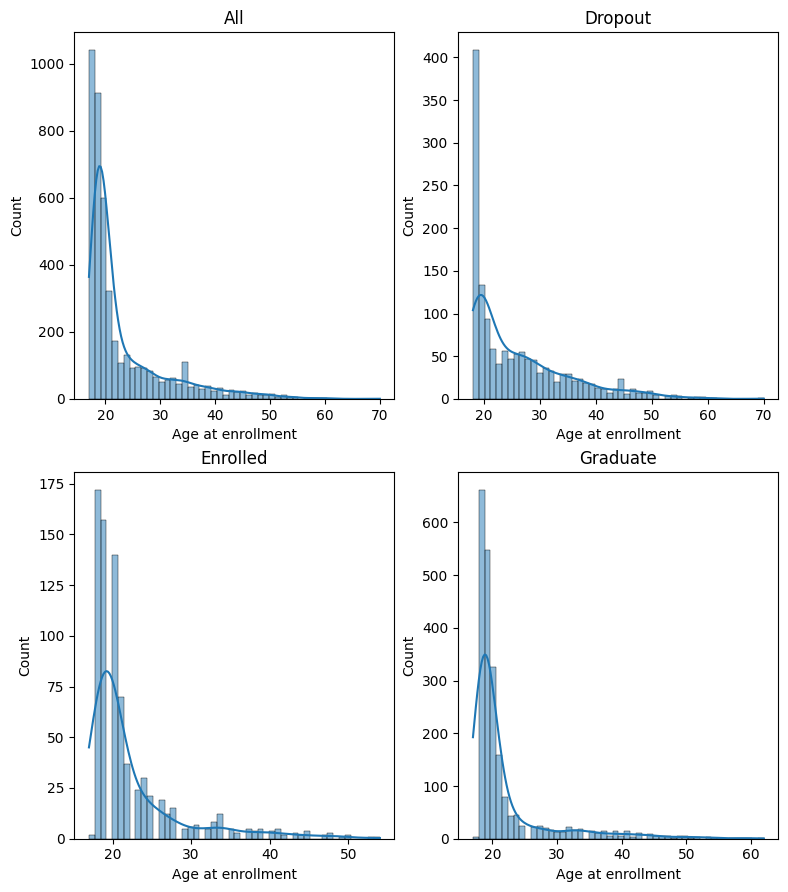

In [7]:
#DISTRIBUTION ISTOGRAMS OF 'AGE AT ENROLLMENT' FEATURE

plt.figure()

plt.subplot(2,2,1).title.set_text('All')

sns.histplot(data=data['Age at enrollment'],bins=50, kde=True);



plt.subplot(2,2,2).title.set_text('Dropout')
a = data[data["Target"]=="Dropout"]
sns.histplot(data=a['Age at enrollment'],bins=50, kde=True);



plt.subplot(2,2,3).title.set_text('Enrolled')
b = data[data["Target"]=="Enrolled"]
sns.histplot(data=b['Age at enrollment'],bins=50, kde=True);



plt.subplot(2,2,4).title.set_text('Graduate')
c = data[data["Target"]=="Graduate"]
sns.histplot(data=c['Age at enrollment'],bins=50, kde=True);

plt.subplots_adjust(left=-0.2,bottom=-0.8)

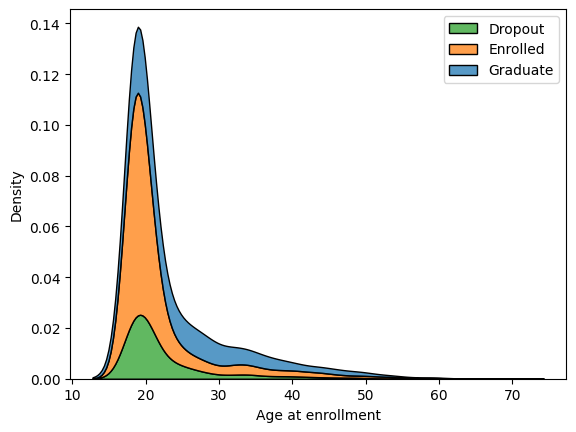

In [8]:
#DISTRIBUTIONS' COMPARISON OF THE 'AGE AT ENROLMENT' FEATURE

plt.figure()
sns.kdeplot(data=data, x='Age at enrollment', hue='Target', multiple="stack")
plt.legend(['Dropout','Enrolled','Graduate'])

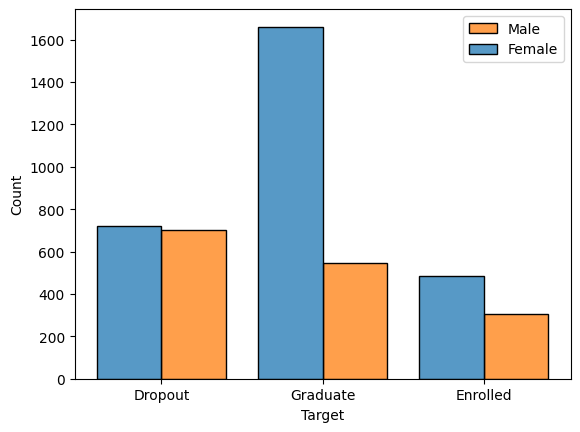

In [9]:
#STUDENTS' GENDER ISTOGRAM

sns.histplot(data=data, x='Target', hue='Gender', multiple="dodge", shrink=.8)
plt.legend(['Male','Female'])

Percentage of debtors: 11.369801084990959 %
Percentage of NON-debtors: 88.63019891500905 %
The percentage of dropout debtors is 21.956368754398312 %
The percentage of enrolled debtors is 11.335012594458437 %
The percentage of graduate debtors is 4.572204617473971 %


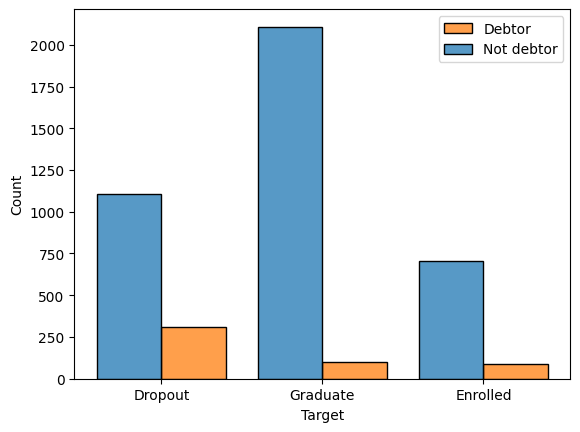

In [10]:
#DEBTORS ISTOGRAM AND THEIR PERCENTAGES

sns.histplot(data=data, x='Target', hue='Debtor', multiple="dodge", shrink=.8)
plt.legend(['Debtor','Not debtor'])

pcts = data['Debtor'].value_counts() / data['Debtor'].count() * 100

print('Percentage of debtors:', pcts[1],"%")
print('Percentage of NON-debtors:', pcts[0],"%")


p=a['Target'].count()

a=a[a['Debtor']==1]

m=a['Target'].count()

print('The percentage of dropout debtors is', m/p*100, '%')


p=b['Target'].count()

b=b[b['Debtor']==1]

m=b['Target'].count()

print('The percentage of enrolled debtors is', m/p*100, '%')


p=c['Target'].count()

c=c[c['Debtor']==1]

m=c['Target'].count()

print('The percentage of graduate debtors is', m/p*100, '%')

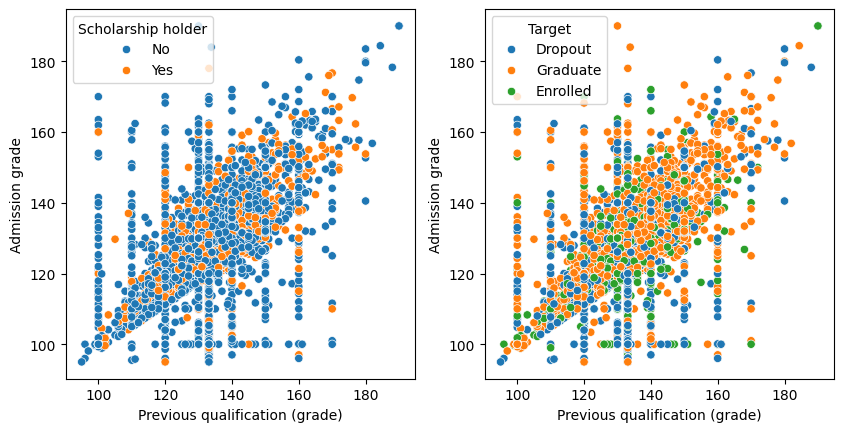

In [11]:
#STUDENTS' ACADEMIC PERFORMANCE SCATTERPLOT

plt.figure()
plt.subplot(1,2,1)
sns.scatterplot(data=data,x=data['Previous qualification (grade)'],y=data['Admission grade'],hue=data['Scholarship holder'].map({ 0: "No", 1: "Yes"}))

plt.subplot(1,2,2)
sns.scatterplot(data=data,x=data['Previous qualification (grade)'],y=data['Admission grade'],hue=data['Target'])

plt.subplots_adjust(left=-0.3)

<Axes: xlabel='PC1', ylabel='PC2'>

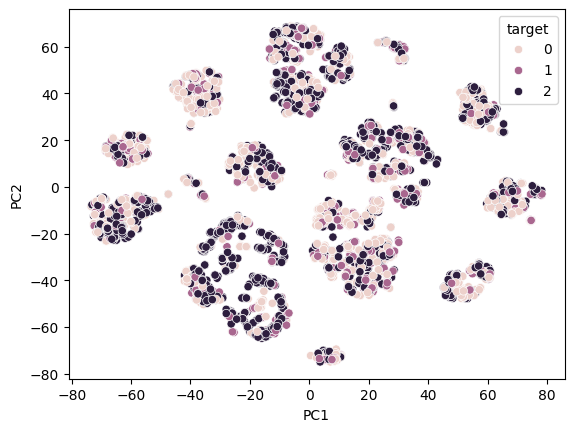

In [12]:
#TSNE

from sklearn.manifold import TSNE

data['Target'] = data['Target'].map({
     'Dropout'  :0,
     'Enrolled' :1,
     'Graduate' :2
 })


tsne=TSNE(n_components=2)

X_tsne=tsne.fit_transform(data)

df_X_tsne=pd.DataFrame(X_tsne,columns=['PC1','PC2'],index=data.index)

df_X_tsne['target']=data['Target']

sns.scatterplot(data=df_X_tsne, x='PC1', y='PC2', hue='target')

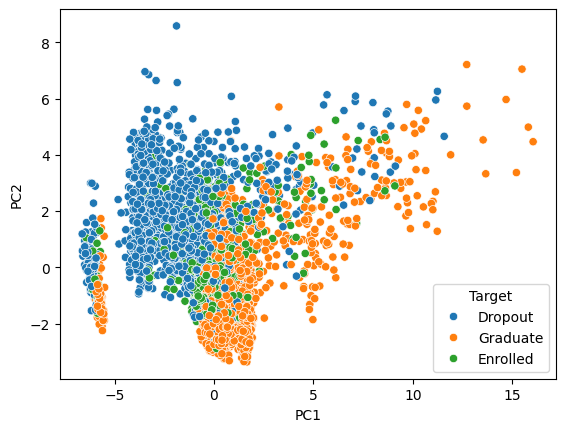

In [13]:
#PCA

#if PCA or TSNE has been performed you have to reload the dataset because 'Target' maps performed subsequently
#on the same dataframe give NaN values. For convenience let's run the import again in this cell

data = pd.read_csv('/content/data.csv',sep=';')


#MAP

data['Target'] = data['Target'].map({
     'Dropout'  :0,
     'Enrolled' :1,
     'Graduate' :2
 })

scaler=StandardScaler()
scaler.fit(data)
x_pca=scaler.transform(data)
x_pca=pd.DataFrame(x_pca)


pca=PCA(n_components=2)

x_pca=pca.fit_transform(x_pca)

x_pca=pd.DataFrame(x_pca,columns=['PC1','PC2'],index=data.index)

x_pca['Target']=data['Target'].map({0:'Dropout', 1:'Enrolled', 2:'Graduate'})

fig1=sns.scatterplot(data=x_pca, x='PC1', y='PC2', hue='Target')

<Axes: xlabel='PC1', ylabel='PC2'>

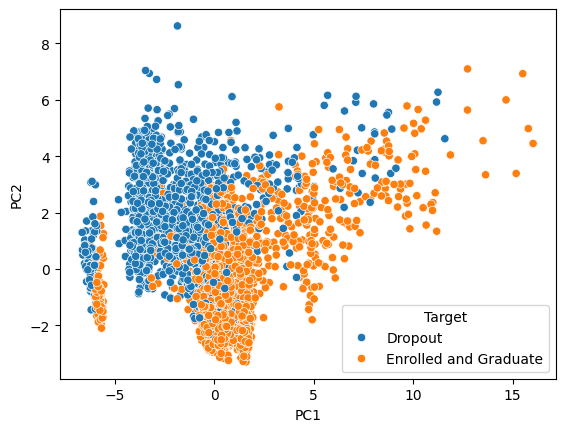

In [14]:
#PCA2

#if PCA or TSNE has been performed you have to reload the dataset because 'Target' maps performed subsequently
#on the same dataframe give NaN values. For convenience let's run the import again in this cell

data = pd.read_csv('/content/data.csv',sep=';')


#MAP

data['Target'] = data['Target'].map({
     'Dropout'  :1,
     'Enrolled' :0,
     'Graduate' :0
 })

scaler=StandardScaler()
scaler.fit(data)
x_pca=scaler.transform(data)
x_pca=pd.DataFrame(x_pca)


pca=PCA(n_components=2)

x_pca=pca.fit_transform(x_pca)

x_pca=pd.DataFrame(x_pca,columns=['PC1','PC2'],index=data.index)

x_pca['Target']=data['Target'].map({1:'Dropout', 0:'Enrolled and Graduate'})

sns.scatterplot(data=x_pca, x='PC1', y='PC2', hue='Target')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



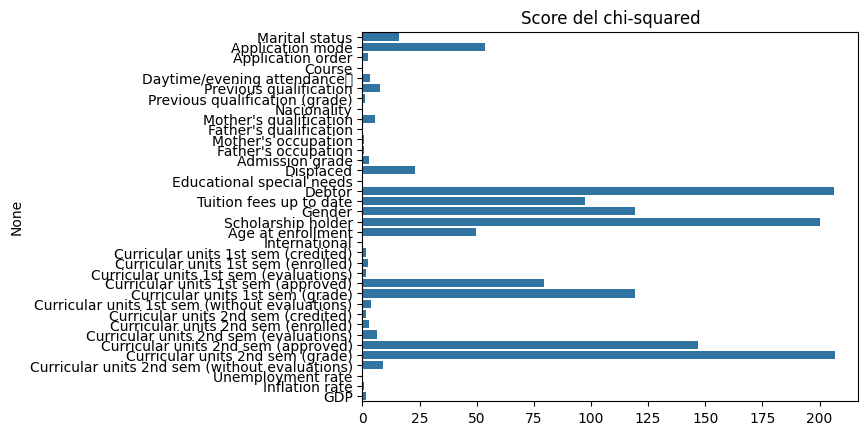

Original number of features: (4424, 36)
Reduced number of features: (4424, 10)
Index(['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')


In [15]:
#if PCA or TSNE has been performed you have to reload the dataset because 'Target' maps performed subsequently
#on the same dataframe give NaN values. For convenience let's run the import again in this cell

data = pd.read_csv('/content/data.csv',sep=';')


#MAP

data['Target'] = data['Target'].map({
     'Dropout' :1,
     'Enrolled' :0,
     'Graduate' :0
 })


#FEATURES' DROP USING CHI-SQUARED

y = data['Target']
data = data.drop(['Target'],axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(data)

X=pd.DataFrame(X, columns=data.columns)

fs=SelectKBest(score_func=chi2,k='all')

fs.fit(X,y)

score=fs.transform(X)



pd.DataFrame({'Variable':data.columns,

              'Importance':fs.scores_}).sort_values('Importance', ascending=False)

sns.barplot(y=data.columns,x=fs.scores_)
plt.title("Score del chi-squared")
plt.show()



chi2_selector = SelectKBest(chi2)
X_kbest = chi2_selector.fit_transform(X, y)

cols_idxs = chi2_selector.get_support(indices=True)
X = X.iloc[:,cols_idxs]

print('Original number of features:', data.shape)
print('Reduced number of features:', X.shape)

print(X.columns)

In [16]:
#if PCA or TSNE has been performed you have to reload the dataset because 'Target' maps performed subsequently
#on the same dataframe give NaN values. For convenience let's run the import again in this cell

#IMPORT

data = pd.read_csv('/content/data.csv',sep=';')


#MAP

data['Target'] = data['Target'].map({
    'Dropout' :1,
    'Enrolled' :0,
    'Graduate' :0
})


#DROP
#we only select the features most related to the variable 'Target' (obtained from the previous cell)

y = data['Target']
data=data[['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)']]


#SPLITTING
#we keep target's distribution

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 0, stratify = y)


#SCALING

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = data.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = data.columns)



#*********************************** MODELS ***********************************



#DECISION TREE

print("\n***********************    DECISION TREE    ***********************\n")
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without CV but with drop:                       ", f1_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="f1")

print("With CV and drop:                               ", scores.mean())



#RANDOM FOREST

print("\n***********************    RANDOM FOREST    ***********************\n")
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Without CV but with drop:                       ", f1_score(y_test,y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="f1")

print("With CV and drop:                               ", scores.mean())



#KNN

print("\n****************************    KNN    ****************************\n")
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Without CV but with drop:                       ", f1_score(y_test,y_pred))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="f1")
print("With CV and drop:                               ", scores.mean())



#XGBOOST

print("\n**************************    XGBOOST    **************************\n")

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import xgboost as xgb


model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Without CV but with drop:                       ", f1_score(y_test,y_pred))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="f1")
print("With CV and drop:                               ", scores.mean())


***********************    DECISION TREE    ***********************

Without CV but with drop:                        0.6844741235392321
With CV and drop:                                0.6776775999381454

***********************    RANDOM FOREST    ***********************

Without CV but with drop:                        0.7540983606557378
With CV and drop:                                0.7484546546833994

****************************    KNN    ****************************

Without CV but with drop:                        0.716636197440585
With CV and drop:                                0.7325984401746439

**************************    XGBOOST    **************************

Without CV but with drop:                        0.73992673992674
With CV and drop:                                0.7325984401746439


In [17]:
#GRID SEARCH

parameters = {
        'min_child_weight': [0.5, 1, 1.5, 2, 5],
        'gamma': [1, 1.5, 1.7, 1.75, 1.8, 2, 3],
        'subsample': [0.7, 0.8, 0.9, 0.95, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'max_depth': [2, 3, 4, 5],
        'learning_rate': [0.1, 0.01]
        }



xgbclass = xgb.XGBClassifier()
clf = GridSearchCV(xgbclass, parameters, scoring='f1', n_jobs=-1)
clf.fit(X_train, y_train)


print("BEST PARAMETERS DATA")

print(clf.best_params_)

y_pred=clf.predict(X_test)
print("F1-score: ", f1_score(y_test,y_pred))

BEST PARAMETERS DATA
{'colsample_bytree': 1.0, 'gamma': 1.75, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1.5, 'subsample': 0.95}
F1-score:  0.7814814814814814


In [18]:
#OVERFITTING
#comparing accuracy (F1 score) on test set and training set

clf=xgb.XGBClassifier(colsample_bytree =0.9, gamma= 1.7, max_depth=3, min_child_weight=0.5, subsample= 0.8, learning_rate=0.1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuratezza su test set:        ",f1_score(y_pred,y_test))

y_pred=clf.predict(X_train)
print("Accuratezza su training set:    ",f1_score(y_pred,y_train))

Accuratezza su test set:         0.7859778597785977
Accuratezza su training set:     0.7873345935727787


<Axes: ylabel='None'>

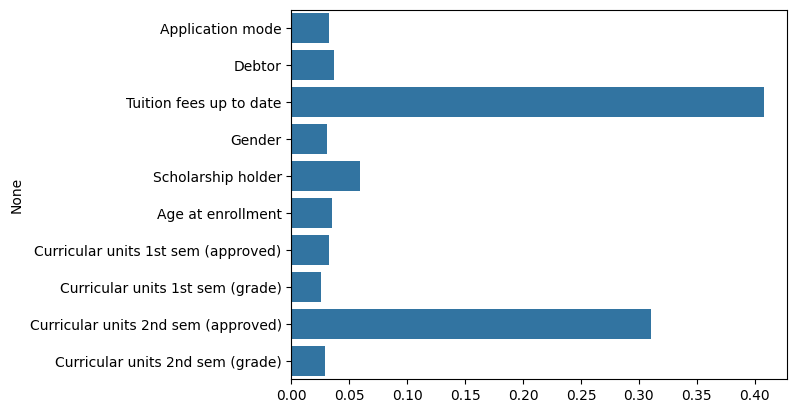

In [19]:
#MODEL INTERPRETATION

model.fit(data,y)
pd.DataFrame({'Variable':data.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

sns.barplot(y=data.columns,x=model.feature_importances_)